# __WEB SCRAPING - MINI PROJECT__
***

## TABLE OF CONTENTS

* [PROJECT IDEA](#PROJECT-IDEA)

    * [Idea behind the project](#Idea-behind-the-project)
    
    * [Application in the industry](#Application-in-the-industry)
    
    * [Project goals](#Project-goals)
    

* [EXCECUTION OF THE PROJECT IDEA + RESULTS](#EXCECUTION-OF-THE-PROJECT-IDEA-+-RESULTS)

    * [Web scraping: National Weather Services (NWS)](#Web-scraping:-National-Weather-Services-(NWS))
    
    * [Automating messages](#Automating-message-and-email-triggers)
        
    * [Visualizations](#Visualizations)
    

* [CONCLUSION](#CONCLUSION)


* [REFERENCES](#REFERENCES)
***

## PROJECT IDEA

### Idea behind the project:

As cities increasingly feel the effects of climate change, we need better technological solutions to improve environmental resilience. Therfore, in this project we will use data science, environmental sensing, and HCI and design methods across various domains such as climate science, public health, and urban design in order to help mitigate the effects of climate change.

The number of hot days is increasing around the globe, while the number of cold days is decreasing. Throughout the continental United States, daily record high temperatures have occurred twice as often as record lows over the past decade, an increase from a near 1:1 ratio in the 1950s. The frequency and intensity of heat waves in the United States are increasing. Although in some parts of the country the 1930's still hold the record for the number of heat waves (primarily linked to the Dust Bowl).

It is possible for extreme heat to increase the risk of other types of disasters. Drought can be aggravated by heat, and hot, dry conditions can make wildfire conditions worse. The urban heat island effect occurs when buildings, roads, and infrastructure absorb heat, resulting in temperatures that are 1 to 7 degrees warmer in urban areas than in outlying areas. During the daytime, this effect is most pronounced, but overnight, the release of heat from an atmosphere heat island or infrastructure makes cities substantially hotter than their surrounding areas. Across the country, rising temperatures pose a threat to people, ecosystems, and the economy.


Heat waves can be extremely dangerous, making it necessary to not only plan strategies to build resilience to extreme heat, but also be prepared in advance for such events. Nevertheless, we should be prepared for the situation in advance by knowing when the heat wave is expected to arrive. The ability to detect an upcoming heat wave can be achieved through web scraping. Yes, you heard it correctly. A web scraper can be used to scrape weather reports on on trusted weather service websites such as the national weather service website and use that information to determine whether a heat wave is imminent. The scraped data can even be used to distribute heat wave alerts in the event of an emergency. This will enable us to spread awareness of any upcoming heat wave, which could potentially save many lives. The scraped data can even be used to visualize the current and upcoming weather conditions too. It is possible to accomplish all of this by scraping weather data from trusted weather websites.

### Application in the industry:

Our main goal is to monitor any upcoming Heat Stress/Waves. This concept can be implemented in various fields. Few of them are as follows:

- Local awareness: This work can be used to deliver real time environmental information to stakeholders such as governmental officials, urban farmers, and vulnerable populations.

- Global health: The scraped data can be used to compare and analyze environmental data in Bloomington, Indiana with historical temperatures in the region to study Climate Change.

- Human health: It can be used to study environmental factors, especially episodes of extreme heat, and how they affect human health.

### Project goals:

The purpose of this project is to develop an awareness alert by scraping real-time data from the web and using it to prepare for heat waves accordingly. Furthermore, this project may be divided into three main parts, namely:

- [Web scraping: National Weather Services (NWS)](#National-Weather-Services-(NWS)-web-scraping)


- [Automating messages](#Automating-message-and-email-triggers)
    
    
- [Visualizations](#Visualizations)

Each of these parts will be elaborately explained in the further sections.
***

## EXCECUTION OF THE PROJECT IDEA + RESULTS

In [145]:
# Importing all necessary libraries:

# Web scraping
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver

# Automating text messages
import os
import csv
from twilio.rest import Client

# Visualizations
%matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

Using matplotlib backend: MacOSX


### Web scraping: National Weather Services (NWS)

__Webpage:__ https://www.weather.gov/forecastpoints?lat=38.315&lon=-85.762&clat=38.259&clon=-85.639&zoom=18&basemap=stamenterrain&bbox=%5B-19719439.353,1706090.691,-1372338.093,10673494.116%5D&layers=RangeRings%7CUSStates%7CUSCounties%7CForecastDot%7CDomain%7C

The above webpage is of Indiana Bloomington's weather conditions calculated/predicted by the NWS. The task here is to scrape this webpage and get the necessary current and future weather condition information. Using this data, we can check if the current or any future temperature mentioned on the webpage is going over the threshold which is set as 100 °F. Crossing the threshold temperature is being considered as a heat wave in this case.

Let's scrape the current and future weather conditions from the NWS webpage. 

We can do this by following the below steps:
- Scrape the part of the website that contains the required weather conditions data.
- Refine the scraped data by converting it from html tag elements to python list.
- Store these rifined data into a csv file

In [129]:
# Configuring webdriver to use Chrome browser:

driver = webdriver.Chrome("/Applications/Google Chrome.app/Contents/MacOS/chromedriver")
driver.get("https://go.usa.gov/xSEst")

# Scraping part of the website that contains required data:

content = driver.page_source
soup = BeautifulSoup(content)

/var/folders/bj/830xfd4x0px7xl175cc4dpkc0000gn/T/ipykernel_5907/2403746917.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Applications/Google Chrome.app/Contents/MacOS/chromedriver")


In [137]:
# Initializing required variables:

headers = []
parameters = []
day1 = []
day2 = []
day3 = []
day4 = []
day5 = []
day6 = []
day7 = []

In [138]:
# Extracting the specific part of the website through its id:

table = soup.find(id="weeklysummary")
# print (table.prettify())
print (table)

<table class="ui-sortable" id="weeklysummary" style="margin: auto; border-collapse: collapse;"><tr class="ui-sortable-handle" style=""><td style="color: rgb(77, 124, 255); font-weight: bold; font-size: 20px;">Weekly Summary</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-right: 5px;">Sun<br/>Apr 30</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-right: 5px;">Mon<br/>May 1</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-right: 5px;">Tue<br/>May 2</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-right: 5px;">Wed<br/>May 3</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-right: 5px;">Thu<br/>May 4</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-right: 5px;">Fri<br/>May 5</td><td style="font-weight: bold; border-bottom: 1px solid rgb(170, 170, 170); padding-righ

In [144]:
# Extracting the specific tags that contains required data:

for i in table.find_all("td"):
 title = i.text
 headers.append(title)  

In [143]:
# Converting the tags into column-wise lists:

for i in range(len(headers)):
    if headers[i]=='':
        break;
    if i%8==0:
        parameters.append(headers[i])
    elif i%8==1:
        day1.append(headers[i])
    elif i%8==2:
        day2.append(headers[i])
    elif i%8==3:
        day3.append(headers[i])
    elif i%8==4:
        day4.append(headers[i])
    elif i%8==5:
        day5.append(headers[i])
    elif i%8==6:
        day6.append(headers[i])
    elif i%8==7:
        day7.append(headers[i])

In [150]:
# Storing the data in csv format:

# df = pd.DataFrame({'0':parameters,'1':day1,'2':day2,'3':day3,'4':day4,'5':day5,'6':day6,'7':day7}) 
df.columns = ['Parameters', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
df.to_csv('7_days_forecast.csv', index=False, encoding='utf-8')
        
# Printing the stored csv table:

data = pd.read_csv('7_days_forecast.csv')
data

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Parameters,,,,,,,
Weekly Summary,SunApr 30,MonMay 1,TueMay 2,WedMay 3,ThuMay 4,FriMay 5,SatMay 6
"Max Temp, °F",54,52,55,62,68,68,72
"Min Temp, °F",45,40,43,38,42,51,49
"Min Wind Chill, °F",37,31,35,31,39,51,45
"Max Wind, mph",18,24,20,14,9,10,13
"Min Wind, mph",9,16,13,6,5,7,10
"Max Wind Gust, mph",30,36,30,21,14,16,20
"Max Cloud Cover, %",91,93,82,40,61,74,54
"Min Cloud Cover, %",77,81,57,7,5,46,26


Now we have the required current and future weather data of Bloomington (IN) from the NWS webpage. Now let us save it in JSON format as well.

In [25]:
# storing data in JSON format
data.to_json('7_days_forecast.json', orient = 'split', compression = 'infer')

***
### Automating messages

Considering we already have the current and future weather conditions data of Bloomington (IN) from the NWS webpage, we can use this data to check for possible heat waves. In this case, we will be setting the threshold to 100 °F. This means that if any of the scraped weather temperature data crosses 100 °F, there is a high probability that it is a heat wave. 

In this section, we will build a code to automate a message whenever the recorded temperature is over the threshold to send a message to any mentioned phone numbers. The phone number can be of emergency service departments such as 911 or even Indiana University Bloomington's emergency service department in our case.

In [9]:
# Storing the csv table as row-wise lists:

csv_table_rows = []
filename = '7_days_forecast.csv'

with open(filename, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        print (row)
        csv_table_rows.append(row)
        
del csv_table_rows[0]

['0', '1', '2', '3', '4', '5', '6', '7']
['Weekly Summary', 'SunApr 30', 'MonMay 1', 'TueMay 2', 'WedMay 3', 'ThuMay 4', 'FriMay 5', 'SatMay 6']
['Max Temp, °F', '54', '52', '55', '62', '68', '68', '72']
['Min Temp, °F', '45', '40', '43', '38', '42', '51', '49']
['Min Wind Chill, °F', '37', '31', '35', '31', '39', '51', '45']
['Max Wind, mph', '18', '24', '20', '14', '9', '10', '13']
['Min Wind, mph', '9', '16', '13', '6', '5', '7', '10']
['Max Wind Gust, mph', '30', '36', '30', '21', '14', '16', '20']
['Max Cloud Cover, %', '91', '93', '82', '40', '61', '74', '54']
['Min Cloud Cover, %', '77', '81', '57', '7', '5', '46', '26']
['Max Prob. of Precip., %', '64', '45', '18', '1', '17', '33', '23']
['Max RH, %', '83', '85', '73', '85', '82', '86', '80']
['Min RH, %', '54', '56', '41', '35', '38', '47', '48']
['Max Dew Point, °F', '41', '37', '37', '36', '43', '47', '47']
['Min Dew Point, °F', '36', '35', '31', '31', '35', '43', '43']


In [42]:
# Select which row data you want to access and store the specific index number as a variable
threshold_parameter_index = 1

# Set a threshold value
threshold = 100

'''
# Since there is no reading amongst the extracted data that crosses the heat wave threshold,
# let's modify one of the temperature reading to test if the following part of the code works
# if there ever is a legit heat wave temperature.
'''

csv_table_rows[1][7] = '105'

df = data.replace('72', '105')
df

,Parameters,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,Weekly Summary,SunApr 30,MonMay 1,TueMay 2,WedMay 3,ThuMay 4,FriMay 5,SatMay 6
1,"Max Temp, °F",54,52,55,62,68,68,105
2,"Min Temp, °F",45,40,43,38,42,51,49
3,"Min Wind Chill, °F",37,31,35,31,39,51,45
4,"Max Wind, mph",18,24,20,14,9,10,13
5,"Min Wind, mph",9,16,13,6,5,7,10
6,"Max Wind Gust, mph",30,36,30,21,14,16,20
7,"Max Cloud Cover, %",91,93,82,40,61,74,54
8,"Min Cloud Cover, %",77,81,57,7,5,46,26
9,"Max Prob. of Precip., %",64,45,18,1,17,33,23


### Text messages using Twilio:

Firstly, let's work on building the code for automating text message triggers whenever the threshold value is reached or passed. In this case, we will be using [Twilio sms API services](https://www.twilio.com/go/sms-api-sales-2?utm_source=google&utm_medium=cpc&utm_term=twilio%20chat&utm_campaign=G_S_NAMER_Brand_Twilio_Tier2&cq_plac=&cq_net=g&cq_pos=&cq_med=&cq_plt=gp&gclid=EAIaIQobChMI05fK4YOS-QIVKk1yCh1dXQVfEAAYASAAEgKoofD_BwE). Twilio APIs provide seamless communication with the users via voice, SMS, video, or chat. Many companies use it to send SMS notifications such as password resets or alerts. In our case, we will be using it for sending out the heat wave alerts. 

The steps to automate messages are as follows:
- Select one of the services that you can use to send text messages through codes. 
- Set the [environment variables](http://twil.io/secure), [account SID and Auth Token](twilio.com/console).
- Code the conditions under which the alert messages should be sent.
- Write the alert message content and also the to and from phone numbers.

In [147]:
# To set the environment variables:

%env AUTH_TOKEN = # Plug in the token value
%env ACCOUNT_SID = # Plug in the sid value

# Account SID and Auth Token:

account_sid = os.environ.get('ACCOUNT_SID')
auth_token = os.environ.get('AUTH_TOKEN')
client = Client(account_sid, auth_token)

env: AUTH_TOKEN=# Plug in the token value
env: ACCOUNT_SID=# Plug in the sid value


In [12]:
# Setting conditions for triggers and automating text messages:

for i in csv_table_rows[threshold_parameter_index]:
    index_val = csv_table_rows[threshold_parameter_index].index(i)
    
    if index_val == 1:
        if int(i) >= threshold:
            #print ('-- EMERGENCY HEAT WAVE ALERT --\nDay: Today - ' + csv_table_rows[0][1] + '\n' + csv_table_rows[threshold_parameter_index][0] + ': ' + i + '°F')
            message = client.messages \
                .create(
                     body='\n\nEMERGENCY HEAT WAVE ALERT \n\nDay: Today - ' + csv_table_rows[0][1] + '\n' + csv_table_rows[threshold_parameter_index][0] + ': ' + str(i) + '°F',
                     from_='+18557760337', #add your twilio number
                     to='+16676771018' #add recievers number
                 )
            print(message.sid)
            
    elif index_val > 1:
        if int(i) >= threshold:
            #print ('-- UPCOMING HEAT WAVE ALERT --\nDay: ' + csv_table_rows[0][index_val] + '\n' + csv_table_rows[threshold_parameter_index][0] + ': ' + i + '°F')
            message = client.messages \
                .create(
                     body='\n\nUPCOMING HEAT WAVE ALERT \n\nDay: ' + csv_table_rows[0][index_val] + '\n' + csv_table_rows[threshold_parameter_index][0] + ': ' + str(i) + '°F',
                     from_='+18557760337', #add your twilio number
                     to='+16676771018' #add recievers number
                 )
            print(message.sid) 

__Results:__

If the value reaches or crosses the threshold, the text message alert will be triggered. The heat wave text message alert will be received as shown below:

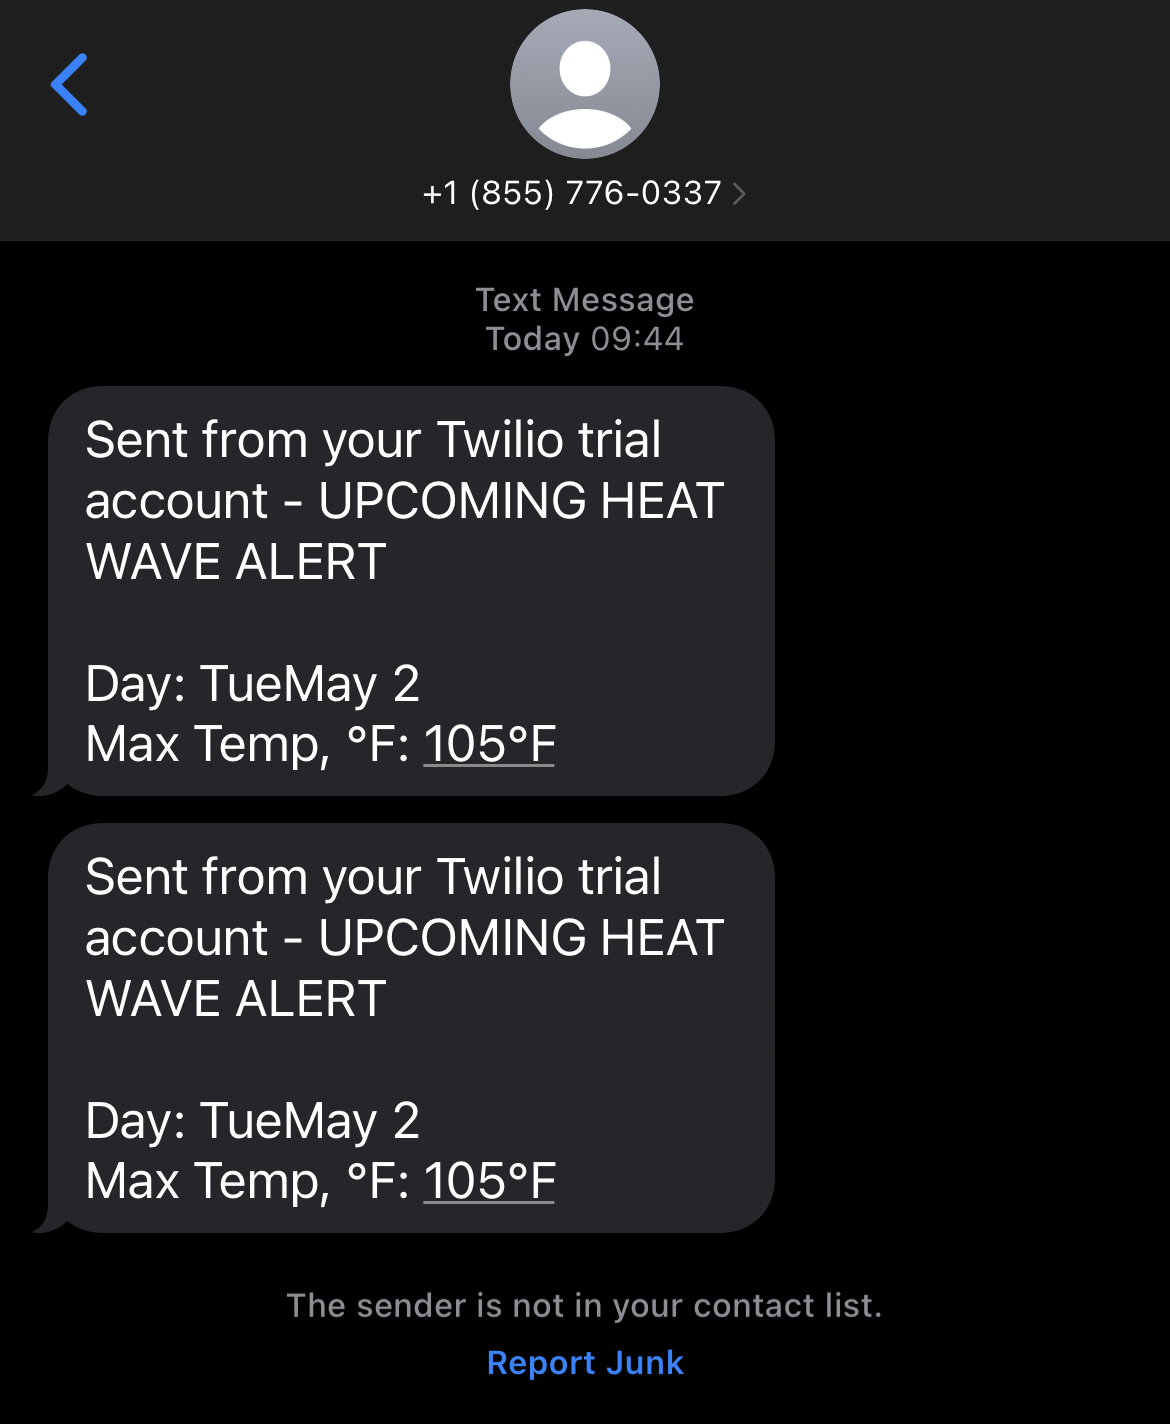

In [146]:
Image(filename='/Users/varsha/Desktop/Sem 4/Web scraping/Mini project/Twilio sms.jpg') 

### Visualizations

#### Dataframe adjustments:

We were using different allignment of the NWS dataframe for the above tasks. But for easier visualization, we will require to make certain changes to the dataframe such as getting the transpose of the original dataframe. Each of the changes made to the dataframe is explained below.

In [81]:
# Importing the NWS data saved in the CSV file
df = pd.read_csv('7_days_forecast.csv', index_col=0)

# Getting the transpose of the original dataframe
df = df.T

df

Parameters,Weekly Summary,"Max Temp, °F","Min Temp, °F","Min Wind Chill, °F","Max Wind, mph","Min Wind, mph","Max Wind Gust, mph","Max Cloud Cover, %","Min Cloud Cover, %","Max Prob. of Precip., %","Max RH, %","Min RH, %","Max Dew Point, °F","Min Dew Point, °F"
Day 1,SunApr 30,54,45,37,18,9,30,91,77,64,83,54,41,36
Day 2,MonMay 1,52,40,31,24,16,36,93,81,45,85,56,37,35
Day 3,TueMay 2,55,43,35,20,13,30,82,57,18,73,41,37,31
Day 4,WedMay 3,62,38,31,14,6,21,40,7,1,85,35,36,31
Day 5,ThuMay 4,68,42,39,9,5,14,61,5,17,82,38,43,35
Day 6,FriMay 5,68,51,51,10,7,16,74,46,33,86,47,47,43
Day 7,SatMay 6,72,49,45,13,10,20,54,26,23,80,48,47,43


In [82]:
# Viewing the index of the dataframe
df.index

Index(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'], dtype='object')

In [83]:
# Viewing the column names of the dataframe
df.columns

Index(['Weekly Summary', 'Max Temp, °F', 'Min Temp, °F', 'Min Wind Chill, °F',
       'Max Wind, mph', 'Min Wind, mph', 'Max Wind Gust, mph',
       'Max Cloud Cover, %', 'Min Cloud Cover, %', 'Max Prob. of Precip., %',
       'Max RH, %', 'Min RH, %', 'Max Dew Point, °F', 'Min Dew Point, °F'],
      dtype='object', name='Parameters')

We notice that the dataframe values are in object datatype. We will require the numbers to be in numeric datatype which will make it easier for data visualization. Therefore, we will be converting certain columns of the dataframe to numeric datatype.

In [88]:
# Converting certain columns of the dataframe to numeric datatype

df['Max Temp, °F'] = pd.to_numeric(df['Max Temp, °F'], errors = 'raise')
df['Min Temp, °F'] = pd.to_numeric(df['Min Temp, °F'], errors = 'raise')
df['Min Wind Chill, °F'] = pd.to_numeric(df['Min Wind Chill, °F'], errors = 'raise')
df['Max Wind, mph'] = pd.to_numeric(df['Max Wind, mph'], errors = 'raise')
df['Min Wind, mph'] = pd.to_numeric(df['Min Wind, mph'], errors = 'raise')
df['Max Wind Gust, mph'] = pd.to_numeric(df['Max Wind Gust, mph'], errors = 'raise')
df['Max Cloud Cover, %'] = pd.to_numeric(df['Max Cloud Cover, %'], errors = 'raise')
df['Min Cloud Cover, %'] = pd.to_numeric(df['Min Cloud Cover, %'], errors = 'raise')
df['Max Prob. of Precip., %'] = pd.to_numeric(df['Max Prob. of Precip., %'], errors = 'raise')
df['Max RH, %'] = pd.to_numeric(df['Max RH, %'], errors = 'raise')
df['Min RH, %'] = pd.to_numeric(df['Min RH, %'], errors = 'raise')
df['Max Dew Point, °F'] = pd.to_numeric(df['Max Dew Point, °F'], errors = 'raise')
df['Min Dew Point, °F'] = pd.to_numeric(df['Min Dew Point, °F'], errors = 'raise')

#### Plots:

Now it is finally time to visualize the scraped NWS data. It is very important to note that the visualizations will not show any heat wave values or alerts in the following visualization as we are using the current real time data from NWS and there are no heat wave warnings in the upcoming few days. The inferrences drawn from the visualizations are included in the comments for each of the plots.

<AxesSubplot:>

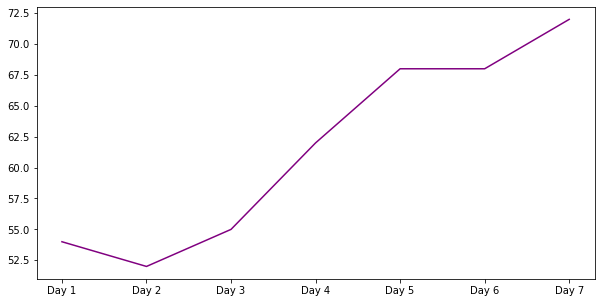

In [121]:
"""
The main factor we are concentrating here in this project is obviously the max temperatures 
of each day. That can easily tell us what if a heat wave is upcoming or not. 
Therefore, firstly let us plot a simple line plot to check the max temperature for the next week.
"""

df["Max Temp, °F"].plot(figsize=(10, 5), color="Purple")

"""
We notice that the temperature is raising through the days. We can interpret from this v
isualization that there might be chances that after a week, there might be a consistent 
increase in the temperature that might result in hotter days but since the max temperature 
in this week is lower than 75, the probability of a heat wave is very low.
"""

<AxesSubplot:xlabel='Weekly Summary'>

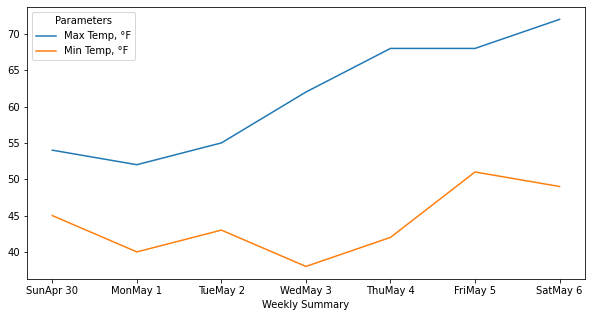

In [100]:
"""
During heat waves although max temperature is the main factor, checking the min temperature also helps 
to a great extent to check weather the heat wave is going to last the whole day or just for a while. 
So comparing the max and min temperature to see the fluctuations could prove to be helpful to predict 
upcoming heat waves.
"""

df.plot(x="Weekly Summary", y=["Max Temp, °F", "Min Temp, °F"],figsize=(10, 5))

"""
The max temperature is slightly above 70 and the lowest is between 30-40 F. 
There seems to be no worries regarding being hit by a heat wave.
"""

<AxesSubplot:xlabel='Weekly Summary'>

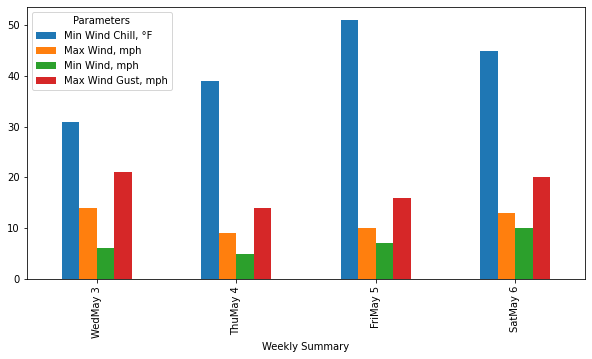

In [101]:
"""
Here we will visualize all the wind related data for the week to check how windy it might be.
Heat waves can come with no winds or very high humid wind. The following visualization can 
help us infer about the wind situation.
"""

top_medians = df[df["Max Temp, °F"] > 60].sort_values("Max Temp, °F")
top_medians.plot(x="Weekly Summary", y=["Min Wind Chill, °F", "Max Wind, mph","Min Wind, mph","Max Wind Gust, mph"], kind="bar",figsize=(10, 5))

"""
We have filtered to just show the data of wind conditions for those days with the max temperature above 60F.
The temperatures seem to be higher on these days as you can see that the wind on these days are 
significantly lower than the other days.
"""

<AxesSubplot:xlabel='Min Temp, °F', ylabel='Max Wind, mph'>

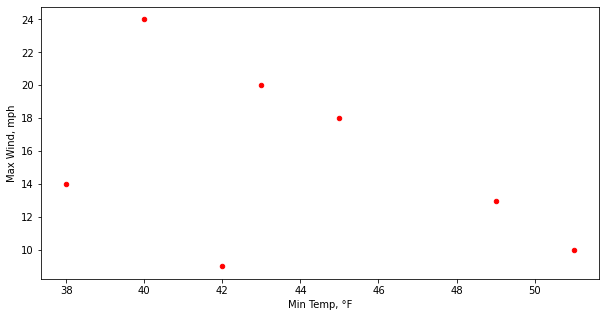

In [110]:
"""
Here we are comparing min temperature vs the max wind. As the wind might add to lower temperatures, 
we can use this plot to check if high wind is resulting in lower temperatures. 
Eventually this resulting in lower chance of facing a heat wave.
"""

df.plot(x="Min Temp, °F", y="Max Wind, mph", kind="scatter", color="Red",figsize=(10, 5))

"""
A negative linear line is clearly seen in the plot.
It is therefore safe to say that as the wind increases, the tempearture decreases. 
Therefore, higher the wind, lower risks of a heat wave.
"""

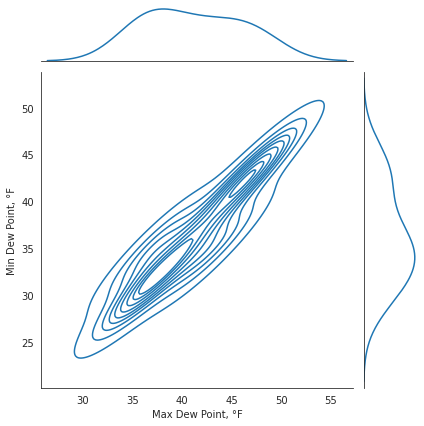

In [109]:
"""
Dew point is said to predict the temperature too. A higher due point is said to result in cooler temperatures. 
Knowing the max and min and reading its pattern of occurance is a good way to check the probability of a heat wave.
We will test this theory using the following visualization.
"""

with sns.axes_style('white'):
    sns.jointplot(df["Max Dew Point, °F"], df["Min Dew Point, °F"], df, kind='kde');
    
"""
It is interesting to notice that the days with the max dew point are 
also approximately the days with the min dew point.
With this kind of balance in the dew points, heat wave is not a possibility.
"""

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


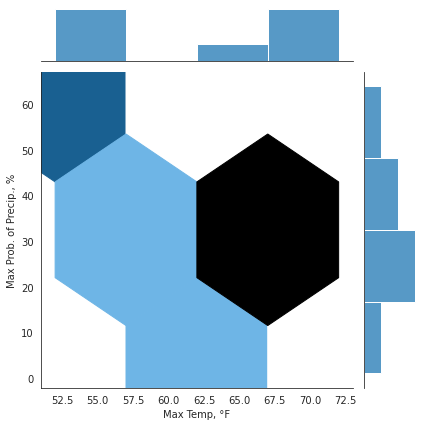

In [113]:
"""
The following visualization resembles the logic of the above visualization 
as even higher Precipitation is said to have lower risks of a heat wave.
So let us check how the Precipitation varies with the max temperature.
"""

with sns.axes_style('white'):
    sns.jointplot(df["Max Temp, °F"], df["Max Prob. of Precip., %"], df, kind='hex')
    
"""
The max precipitation indication lies in the 65-75F temp region.
Too low or too high temperature seems to be inappropriate for high precipitation.
In this temperature range, heat wave is not a worry.
"""

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


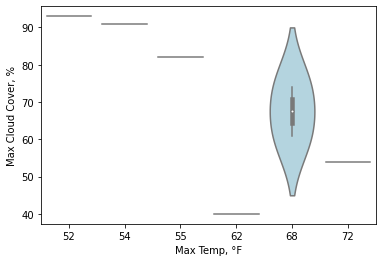

In [118]:
"""
We all know that the cloudier it is, lower the temperature usually is. 
Again, lower the temperature, lesser the chances of heat wave. 
Let's test thisout with max temperature factor.
"""

sns.violinplot("Max Temp, °F", "Max Cloud Cover, %", data=df,
               palette=["lightblue", "lightpink"]);

"""
With the max temperature being between 72-75 and cloud cover being so high this week, 
heat wave is not a viable possibility.
"""

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


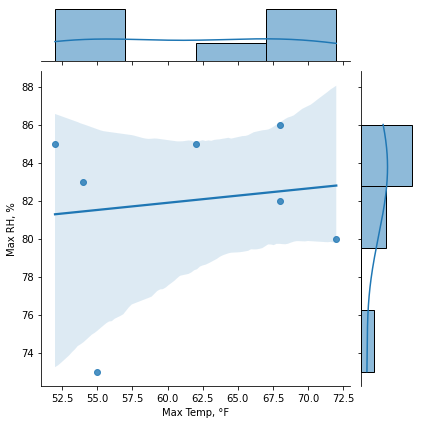

In [116]:
"""
We are comparing to see if RH affects the max temperature and if yes, to what extent.
"""

sns.jointplot("Max Temp, °F", "Max RH, %", data=df, kind='reg');

"""
Humidity is a highly important factor that contributes to any possible heat waves.
After comparing the max temperature and the relative humidity, they are directly proportional as usual.
If the temperature was very high, there is no doubt that the humidity would also increase.
This might lead to a heat wave if they cross the threshold values.
"""

<AxesSubplot:>

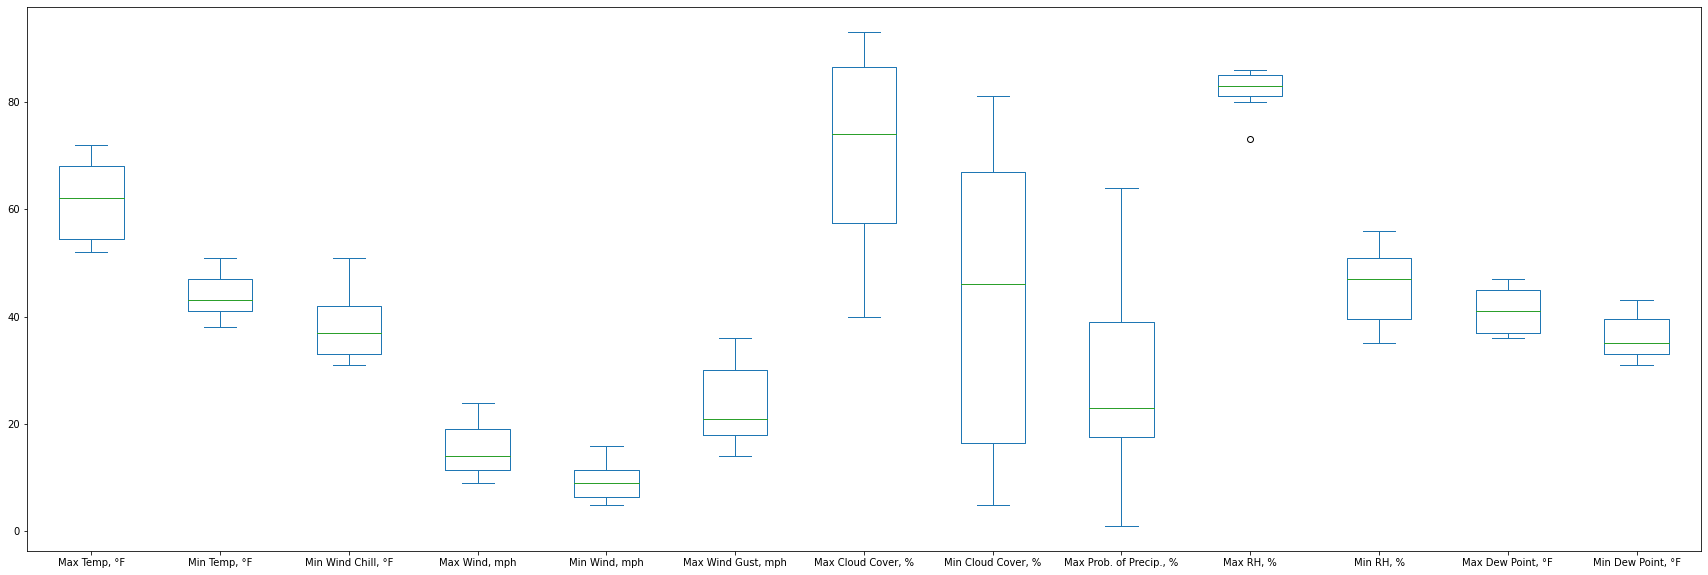

In [128]:
"""
So far we have compared one particular factor with another directly to check for their correlation. 
It is also important to have a statistical summary of all factors to derive insights from the overviews.
"""

df.plot(kind='box', figsize=(30, 10))

"""
Through the overview we can tell that the highest temperature does not cross 80. 
The max variation is in the cloud coverage factors.
The min variation is in the RH factor whose magnitude is not really high for the week.
This way after analyzing all the weather elements, you can infer that possibility 
of a heat wave is negligible for this week.
"""

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


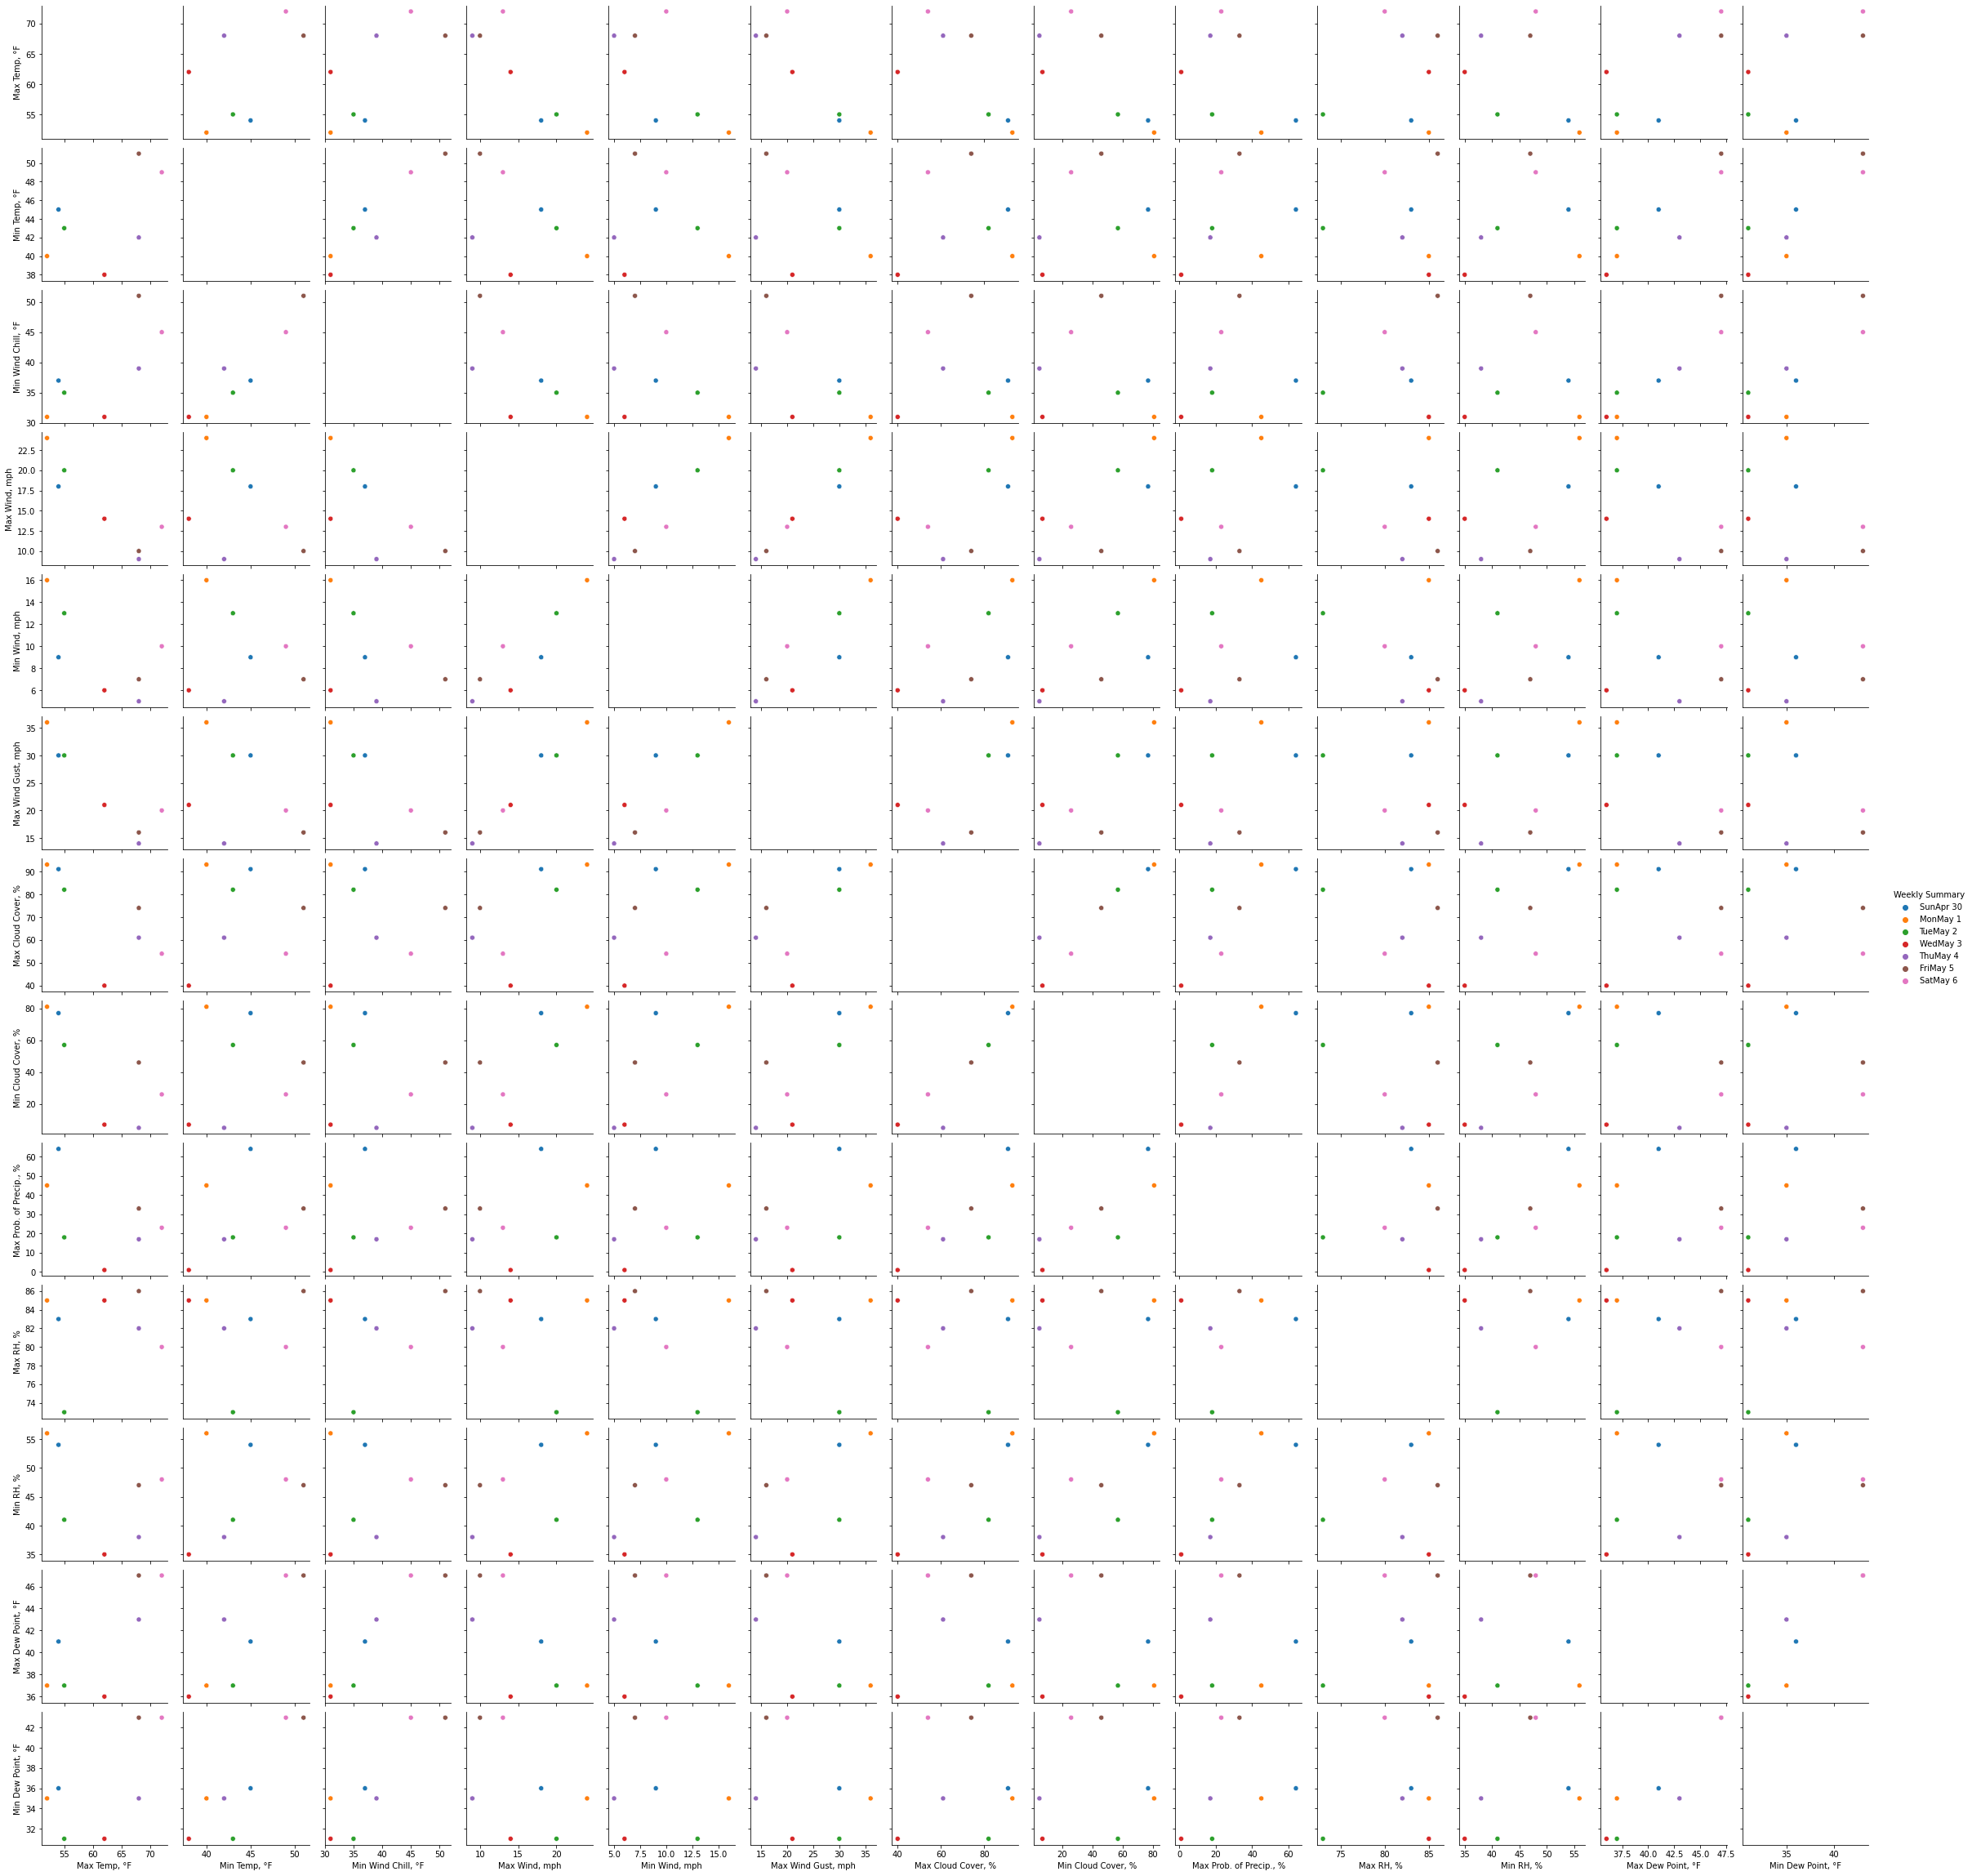

In [117]:
"""
After plotting the statistical data, now let us get the correlation plot 
of the whole dataset for the purpose of getting an overview again but this time without the stats.
"""

sns.pairplot(df, hue='Weekly Summary', size=2.5);

"""
With this dataframe scatter plot, we can see the overall correlation of one weather element with an other
and check if they are directly or inversely proportional to each other. We can also get an overview of the
magnitude of each factor which is useful to glance and predict the possibility of a heat wave.
"""

## CONCLUSION

In light of the increasing number of hot days and heat waves, it is imperative that we take steps to mitigate these risks. Using data science, environmental sensing, and human-computer interaction and design methods in a variety of domains such as climate science, public health, and urban design can assist us in developing effective strategies to build resilience to extreme heat. It is possible to detect upcoming heat waves and distribute emergency alerts using web scraping, for example. The ability to scrape weather data from trusted weather websites not only allows us to anticipate the arrival of a heat wave, but also to visualize the current and upcoming weather conditions.

In order to ensure that data is used for a legitimate purpose, web scraping should be conducted in an ethical and responsible manner. A web scraping tool should not replace official weather channels, but rather be used as a complementary tool to increase awareness and preparedness for extreme weather. We can build more resilient cities that are better prepared to deal with the challenges posed by climate change through the integration of technology and innovative solutions, climate science, public health, and urban design. By working together and taking a multidisciplinary approach, we can work towards a sustainable future and mitigate the risks associated with extreme weather conditions.

In conclusion of this project, the NWS data was successfully scraped and we were able to even automate trigger alerts using the scraped data and Twilio to overcome such climatic difficulties. This way web scraping can be implemented in various industries to perform various types of tasks. This project was just a small example of what web scraping is capable of doing. We also visualized the scraped data to check for factors such as correlation, magnitude, etc. Visualizing the scraped data can help us infer the data in a much easier and meaningful way. Using these methods, we could tell that we do not have any risks of heat waves in the next 7 days.

## REFERENCES

* https://www.c2es.org/content/heat-waves-and-climate-change/
* http://healthycities.sice.indiana.edu/index.html